In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 
url = "http://pbpython.com/extras/sample-salesv2.csv" 
sales = pd.read_csv(url)

In [4]:
sales.columns

Index(['account number', 'name', 'sku', 'category', 'quantity', 'unit price',
       'ext price', 'date'],
      dtype='object')

In [5]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [6]:
sales.columns = ['account_number', 'name', 'sku', 'category', 'quantity', 'unit_price',
       'ext_price', 'date']

In [7]:
sales.head()

,account_number,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


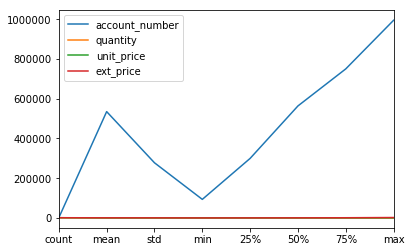

In [12]:
sales.describe().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002474C153828>]], dtype=object)

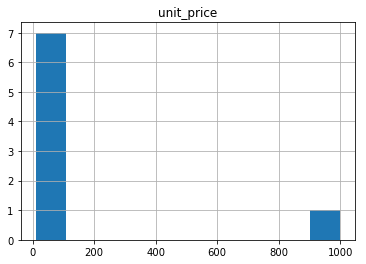

In [13]:
sales[['unit_price']].describe().hist()

In [17]:
shirtSet = sales[['name', 'category', 'quantity', 'unit_price']]

In [18]:
shirtSet.head()

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64


In [20]:
shirtSet = shirtSet[shirtSet['category'] == 'Shirt']

In [21]:
shirtSet.head()

,name,category,quantity,unit_price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


In [22]:
shirtSet['shirt_sales'] = shirtSet.quantity * shirtSet.unit_price

In [23]:
shirtSet.head()

,name,category,quantity,unit_price,shirt_sales
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


In [27]:
shirtSet.sort_values(by='quantity', ascending=False).head(10)

,name,category,quantity,unit_price,shirt_sales
854,Kilback-Gerlach,Shirt,20,72.86,1457.2
132,Hegmann and Sons,Shirt,20,25.37,507.4
649,Waters-Walker,Shirt,20,49.97,999.4
935,"Davis, Kshlerin and Reilly",Shirt,20,11.96,239.2
182,Hegmann and Sons,Shirt,20,96.98,1939.6
91,"Kerluke, Reilly and Bechtelar",Shirt,20,28.61,572.2
383,Heidenreich-Bosco,Shirt,20,94.00,1880.0
857,Kunze Inc,Shirt,20,36.00,720.0
878,Gorczany-Hahn,Shirt,20,31.99,639.8
918,Cole-Eichmann,Shirt,20,96.14,1922.8


In [36]:
topSellers = shirtSet.groupby('name', as_index=False).sum()

In [37]:
topSellers.head(10)

,name,quantity,unit_price,shirt_sales
0,Berge LLC,166,1226.54,9670.24
1,Carroll PLC,257,1098.93,13717.61
2,Cole-Eichmann,236,1226.75,14528.01
3,"Davis, Kshlerin and Reilly",161,828.51,7533.03
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
5,Gorczany-Hahn,237,1132.22,12576.83
6,Hamill-Hackett,148,1091.55,8880.04
7,Hegmann and Sons,278,1528.84,16774.47
8,Heidenreich-Bosco,92,582.24,5965.25
9,Huel-Haag,200,1146.17,11944.01


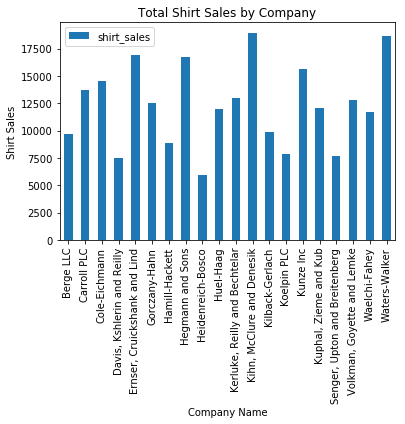

In [45]:
bestPlot = topSellers.plot(kind='bar', title='Total Shirt Sales by Company', x='name', y='shirt_sales')
bestPlot.set_xlabel('Company Name')
bestPlot.set_ylabel('Shirt Sales')